In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#from sklearn.grid_search import GridSearchCV
%matplotlib inline


In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
import pymongo
import pandas as pd
from pymongo import MongoClient

In [4]:
client = MongoClient()

#point the client at mongo URI
client = MongoClient('mongodb://localhost:27017')
#select database
db = client['Project']
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Project')


In [5]:
#select the collection within the database
business_joined = db['business_joined']
print(business_joined)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Project'), 'business_joined')


In [6]:
cursor = business_joined.find()
print(cursor)

In [7]:
import warnings
warnings.filterwarnings("ignore")
def batched(cursor, batch_size):
    batch = []
    for doc in cursor:
        batch.append(doc)
        if batch and not len(batch) % batch_size:
            yield batch
            batch = []

    if batch:   # last documents
        yield batch

df = pd.DataFrame()
for batch in batched(cursor, 10000):
    df = df.append(batch, ignore_index=True)

In [8]:
restaurants_reviews = df

In [9]:
print(restaurants_reviews.columns)

Index(['_id', 'address', 'business_id', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'restaurant_stars',
       'state', 'DogsAllowed', 'RestaurantsTakeOut', 'HappyHour',
       'OutdoorSeating', 'GoodForKids', 'HasTV', 'RestaurantsReservations',
       'WheelchairAccessible', 'RestaurantsPriceRange', 'Wifi', 'Noiselevel',
       'Alcohol', 'DriveThru', 'Categories', 'cool', 'date', 'funny',
       'review_id', 'stars', 'text', 'useful'],
      dtype='object')


In [10]:
restaurants_reviews.head()

,_id,address,business_id,city,is_open,latitude,longitude,name,postal_code,review_count,...,Alcohol,DriveThru,Categories,cool,date,funny,review_id,stars,text,useful
0,63fe89f0d60a9a69b84f365a,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,2,2012-06-26 18:31:16,1,Mgw2Tzea5quFVwBQL1OFYA,4,I think its funny when people bitch that there...,3
1,63fe89f0d60a9a69b84f365b,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,1,2011-12-02 14:05:58,1,8sOaDBSRKSMvvgd-FF7-cQ,3,"My wife and I just had our second child, and w...",3
2,63fe89f0d60a9a69b84f365c,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,0,2011-04-26 03:15:09,0,a00WNmUzoFv4jlJ7qHsnbQ,4,I eat at pagelli's italiano for the first time...,0
3,63fe89f0d60a9a69b84f365d,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,0,2011-10-02 02:20:39,0,BZXl-NZ2zkah2Q_7E6RDkg,4,Went here for the early dinner special before ...,0
4,63fe89f0d60a9a69b84f365e,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,0,2011-11-06 00:51:34,0,nAeVYBEmx1Xf5EXxRo1fKA,1,"Went for dinner, and never even got our food. ...",2


In [11]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(restaurants_reviews.shape)

Shape of the dataset:
(497887, 33)


In [12]:
# #CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
restaurants_reviews['length'] = restaurants_reviews['text'].apply(len)
restaurants_reviews.head()

,_id,address,business_id,city,is_open,latitude,longitude,name,postal_code,review_count,...,DriveThru,Categories,cool,date,funny,review_id,stars,text,useful,length
0,63fe89f0d60a9a69b84f365a,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,2,2012-06-26 18:31:16,1,Mgw2Tzea5quFVwBQL1OFYA,4,I think its funny when people bitch that there...,3,984
1,63fe89f0d60a9a69b84f365b,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,1,2011-12-02 14:05:58,1,8sOaDBSRKSMvvgd-FF7-cQ,3,"My wife and I just had our second child, and w...",3,3870
2,63fe89f0d60a9a69b84f365c,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,0,2011-04-26 03:15:09,0,a00WNmUzoFv4jlJ7qHsnbQ,4,I eat at pagelli's italiano for the first time...,0,127
3,63fe89f0d60a9a69b84f365d,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,0,2011-10-02 02:20:39,0,BZXl-NZ2zkah2Q_7E6RDkg,4,Went here for the early dinner special before ...,0,526
4,63fe89f0d60a9a69b84f365e,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,0,2011-11-06 00:51:34,0,nAeVYBEmx1Xf5EXxRo1fKA,1,"Went for dinner, and never even got our food. ...",2,168


# (4). Visualization:
Let us now visualize the if there is any correlation between stars and the length of the review.

<Figure size 2000x500 with 0 Axes>

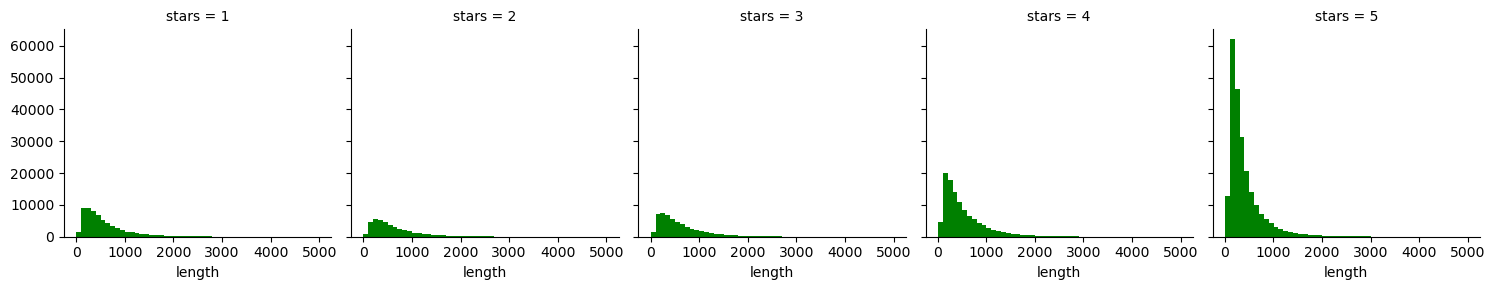

In [13]:
# COMPARING TEXT LENGTH TO STARS
plt.figure(figsize=(20,5)) # figsize=(width,height)
graph = sns.FacetGrid(data=restaurants_reviews,col='stars')
# sns.FacetGrid(data= Dataset_name,col=col_name which contains categorical value)
# FacetGrid object using the seaborn library, which allows 
# us to plot multiple graphs side by side based on a categorical variable
graph.map(plt.hist,'length',bins=50,color='Green')

In [14]:
# counting the no of reviews by stars given
df1 = pd.DataFrame(restaurants_reviews['stars'].value_counts()).reset_index().sort_values(by='index')

In [15]:
df2= df1.set_index("index")
df2

,stars
index,
1,61678
2,41602
3,54053
4,110611
5,229943


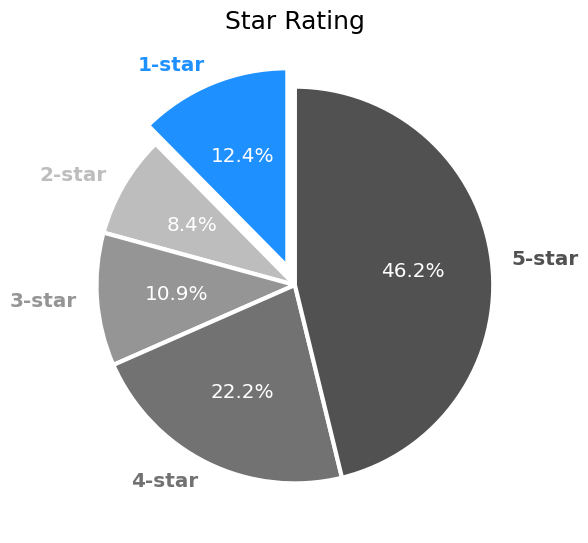

In [16]:
import numpy as np
labels = ["1-star", "2-star", "3-star", "4-star","5-star"]
fig, ax = plt.subplots(figsize=(6, 6))

# Get four different grey colors.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.25, 0.75, len(df2))))
# Swap in a bright blue for the Lacrosse color.
colors[0] = 'dodgerblue'

# You could also just manually assign colors very easily.
# colors = ['purple', 'black', 'pink', 'aqua']

patches, texts, pcts = ax.pie(
    df2['stars'], labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1,0, 0, 0, 0))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Star Rating', fontsize=18)
plt.tight_layout()

# This is a code snippet in Python using the matplotlib library for data visualization. 
# It creates a pie chart to display the distribution of star ratings in a dataset.

# The 'labels' list contains the names of the different star ratings. The figure size is set to 6 units (width) by 6 units 
# (height). The 'get_cmap' function is used to get a grayscale color map from matplotlib, and then a list of colors is 
# generated by taking equally spaced values from the grayscale color map and adjusting the brightness to make them more 
# distinguishable.

# The 'ax.pie' function creates the pie chart by passing in the values from the 'stars' column of the 'df2' dataset, 
# the labels, and the percentage format for the autopct argument. The 'wedgeprops' argument specifies the properties
# for the edges of each pie wedge, such as the line width and color. The 'textprops' argument sets the font size for
# the labels on the pie chart. The 'startangle' argument specifies the starting angle for the first pie wedge, which
# is set to 90 degrees (the "north" position).

# The 'explode' argument is used to "explode" the first wedge of the pie chart by a small amount, 
# which makes it stand out from the others. The 'patches', 'texts', and 'pcts' variables store the objects returned by
# the 'ax.pie' function, which are used to set the colors for each wedge and adjust the font weight and color for the 
# labels and percentages.

# Finally, the 'ax.set_title' function sets the title for the pie chart, and 'plt.tight_layout' ensures that
# the plot is properly spaced and fits within the figure size. Overall, this code generates a visually appealing
# pie chart that effectively displays the distribution of star ratings in a dataset.

#matplotlib pie chart with explode and custom colors

In [17]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
df_num=restaurants_reviews[['stars', 'useful',
       'funny', 'cool', 'length']]
df_num.corr()


,stars,useful,funny,cool,length
stars,1.000000,-0.025019,-0.038354,0.051946,-0.179627
useful,-0.025019,1.000000,0.817878,0.884925,0.255985
funny,-0.038354,0.817878,1.000000,0.869569,0.190020
cool,0.051946,0.884925,0.869569,1.000000,0.181002
length,-0.179627,0.255985,0.190020,0.181002,1.000000


In [18]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
restaurants_reviews['Target'] = ''
restaurants_reviews.loc[restaurants_reviews.stars >=3.5, 'Target'] = '1'
restaurants_reviews.loc[restaurants_reviews.stars==3,'Target'] = '3'
restaurants_reviews.loc[restaurants_reviews.stars <=2.5, 'Target'] = '0'

restaurants_reviews.drop(restaurants_reviews.loc[restaurants_reviews['Target']=='3'].index,axis=0,inplace=True)
restaurants_reviews.Target.value_counts()

1    340554
0    103280
Name: Target, dtype: int64

In [19]:
# convert text to lower case

restaurants_reviews.text = restaurants_reviews.text.str.lower()

## remove unnecessary punctuation(we can remove by string.punctuation)
restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').str.replace('[0-9]*[+-:]*[0-9]+', '')

restaurants_reviews['removed_punct_text'].head()

0    i think its funny when people bitch that there...
2    i eat at pagelli's italiano for the first time...
3    went here for the early dinner special before ...
4    went for dinner and never even got our food  t...
6    the fettuccine alfredo is fantastic at pagelli...
Name: removed_punct_text, dtype: object

In [20]:
# selecting 2 column from dataframe and storing them in nwe dataframe
df_final = restaurants_reviews[['removed_punct_text','Target']]
df_final = df_final.reset_index()

In [21]:
# renaming the column name 
df_final.rename(columns = {'index':'rem'}, inplace = True)
df_final

,rem,removed_punct_text,Target
0,0,i think its funny when people bitch that there...,1
1,2,i eat at pagelli's italiano for the first time...,1
2,3,went here for the early dinner special before ...,1
3,4,went for dinner and never even got our food t...,0
4,6,the fettuccine alfredo is fantastic at pagelli...,1
...,...,...,...
443829,497879,i drive by this everyday so i decided to try i...,0
443830,497880,last night a friend and l went to gyros on th ...,0
443831,497881,as expensive as they are i was hoping for a gr...,0
443832,497882,ok my gyro was loaded with meat and it was coo...,1


In [22]:
df_final.drop('rem',axis=1,inplace=True)

In [23]:
# converting datatype of target column to integer
df_final.Target = df_final.Target.astype('int')

In [24]:
df_final.columns

Index(['removed_punct_text', 'Target'], dtype='object')

In [25]:
df_final.head()

,removed_punct_text,Target
0,i think its funny when people bitch that there...,1
1,i eat at pagelli's italiano for the first time...,1
2,went here for the early dinner special before ...,1
3,went for dinner and never even got our food t...,0
4,the fettuccine alfredo is fantastic at pagelli...,1


In [26]:
# converting datatype of Target column to 'int'
df_final.Target = df_final.Target.astype('int')

In [30]:
# counting + and - reviews seperately
df_final.Target.value_counts()

1    340554
0    103280
Name: Target, dtype: int64

In [31]:
temp=df_final.sample(100000)
temp=temp.reset_index()
temp=temp.rename(columns={'index':'rem'})
temp.drop('rem',axis=1,inplace=True)
temp.head()

,removed_punct_text,Target
0,my favorite brunch place in tampa perfect vari...,1
1,i had the enchiladas with green sauce and whit...,1
2,one word gazpacho finally it is back and hopef...,1
3,short of one minor incident that was handled p...,1
4,great food and great service we can't wait to...,1


In [34]:
# Cleaning the texts
# we have to do this for all three dataset 
# this is for dataset1
# It just for model comaparision
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0, temp.shape[0]):
    review = temp['removed_punct_text'][i]
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus1.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 3000)
X = cv.fit_transform(corpus1).toarray()
#X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y = temp.iloc[:, 1]

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 2023,
                                                    stratify=y)

# Applying Verious Machine Learning Modules

## 1.GaussianNB

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import os

In [42]:
nb = GaussianNB()
nb.fit(X_train, y_train) # Aprior Probs get calculated
y_pred_prob = nb.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.9026697263047845
[[ 4074   556]
 [ 2343 13027]]
0.85505


In [33]:
# X=temp.removed_punct_text
# y=temp.Target

In [32]:
validation=df_final.sample(10000)
validation=validation.reset_index()
validation=validation.rename(columns={'index':'rem'})
validation.drop('rem',axis=1,inplace=True)
validation.head()

,removed_punct_text,Target
0,i had the best breakfast ever my husband goes...,1
1,amazing food even better service lamarl was on...,1
2,wowwhat a fabulous new addition to the area we...,1
3,this place was excellent everything from the g...,1
4,just had the pulled chicken burritoit was huge...,1


In [44]:

# Cleaning the texts
# we have to do this for all three dataset 
# this is for dataset1
# It just for model comaparision
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
corpus2 = []
for i in range(0, validation.shape[0]):
    review = validation['removed_punct_text'][i]
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 4000)
X_val = cv.fit_transform(corpus2).toarray()
#X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y_val = validation.iloc[:, 1]

## Testing of GaussianNB

In [48]:
y_pred_prob = nb.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, y_pred_prob))

y_pred = nb.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

0.58116111520338
[[ 991 1320]
 [2089 5600]]
0.6591


### Pickeling the Machine learning Model

In [73]:
# save the trained logistic regression model to a file
with open('GaussianNB_March7.pkl', 'wb') as file:
    pickle.dump(nb, file)

## 2.Random Forest

In [51]:
# Random_Forest for dataset1:
# Fitting any algo to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=2022,n_estimators=25)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
### Predicted Probabilities
y_pred_prob = classifier.predict_proba(X_test)[:,1]

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

print(roc_auc_score(y_test, y_pred_prob))

[[ 3453  1177]
 [  314 15056]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.82      4630
           1       0.93      0.98      0.95     15370

    accuracy                           0.93     20000
   macro avg       0.92      0.86      0.89     20000
weighted avg       0.92      0.93      0.92     20000

0.92545
0.9704233092712375


### Pickeling the Machine learning Model

In [72]:
# save the trained logistic regression model to a file
with open('RandomForest_March7.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [53]:
y_pred_prob = classifier.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, y_pred_prob))

y_pred = classifier.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

0.6668896357584345
[[1237 1074]
 [2430 5259]]
0.6496


## 3.XG BOOST 

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score

In [56]:
## XG
from xgboost import XGBClassifier
XGB_model = XGBClassifier(random_state=2023)
XGB_model.fit(X_train, y_train)

XGB_model = XGBClassifier(random_state=2023)
XGB_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = XGB_model.predict(X_test)
### Predicted Probabilities
y_pred_prob_xgb = XGB_model.predict_proba(X_test)[:,1]



In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
print(confusion_matrix(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))

print(accuracy_score(y_test, y_pred_xgb))

print(roc_auc_score(y_test, y_pred_prob_xgb))

[[ 3864   766]
 [  350 15020]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      4630
           1       0.95      0.98      0.96     15370

    accuracy                           0.94     20000
   macro avg       0.93      0.91      0.92     20000
weighted avg       0.94      0.94      0.94     20000

0.9442
0.9812942592439059


### Pickeling the Machine learning Model

In [71]:
# save the trained logistic regression model to a file
with open('XGB_model_March7.pkl', 'wb') as file:
    pickle.dump(XGB_model, file)

### Test Dataset of XGBoost

In [59]:
y_pred_prob = XGB_model.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, y_pred_prob))

y_pred = XGB_model.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

0.7010136145647777
[[1305 1006]
 [2053 5636]]
0.6941


## 4.Light GBM 

In [61]:
## for dataset3
## lightgbm

from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(random_state=2023)
lgbm.fit(X_train, y_train)
# Predicting the Test set results
y_pred_lgbm = lgbm.predict(X_test)
### Predicted Probabilities
y_pred_prob_lgbm = lgbm.predict_proba(X_test)[:,1]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
print(confusion_matrix(y_test, y_pred_lgbm))

print(classification_report(y_test, y_pred_lgbm))

print(accuracy_score(y_test, y_pred_lgbm))

print(roc_auc_score(y_test, y_pred_prob_lgbm))


[[ 3863   767]
 [  385 14985]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4630
           1       0.95      0.97      0.96     15370

    accuracy                           0.94     20000
   macro avg       0.93      0.90      0.92     20000
weighted avg       0.94      0.94      0.94     20000

0.9424
0.981796801994292


### Test Dataset for Light GBM 

In [66]:
y_pred_prob = lgbm.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, y_pred_prob))

y_pred = lgbm.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

0.6989450444218923
[[1357  954]
 [2265 5424]]
0.6781


### Pickeling the Machine learning Model

In [68]:
import pickle

In [69]:
# save the trained logistic regression model to a file
with open('lgbm_March7.pkl', 'wb') as file:
    pickle.dump(lgbm, file)

## 5.Support Vector Machine

In [67]:
## SVM For dataset1
## SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=2,probability=True, random_state=2023)
svm.fit(X_train, y_train)
# Predicting the Test set results
y_pred = svm.predict(X_test)
### Predicted Probabilities
y_pred_prob = svm.predict_proba(X_test2)[:,1]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

AttributeError: predict_proba is not available when  probability=False

### Test Dataset

In [65]:
y_pred_prob = svm.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, y_pred_prob))

y_pred = svm.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

0.7010136145647777
[[1305 1006]
 [2053 5636]]
0.6941


### Pickeling the Machine learning Model

In [ ]:
import pickle

In [ ]:
# save the trained logistic regression model to a file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Creating Word Cloud for Positive and Negative Sentiment

In [74]:
df_final.Target = df_final.Target.astype('int')

In [75]:
pos = pd.DataFrame(df_final[df_final['Target']==1]['removed_punct_text'])
neg = pd.DataFrame(df_final[df_final['Target']==0]['removed_punct_text'])

In [76]:
pos.head(5)

,removed_punct_text
0,i think its funny when people bitch that there...
1,i eat at pagelli's italiano for the first time...
2,went here for the early dinner special before ...
4,the fettuccine alfredo is fantastic at pagelli...
7,pagellis is by far one of my favorite places t...


In [77]:
pos = pos.reset_index().drop('index',axis=1)
neg = neg.reset_index().drop('index',axis=1)

In [78]:
# Import the necessary modules from the Natural Language Toolkit library
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [79]:
# Print the list of stopwords in the English language
print(stopwords.words('english'))

# Assign the list of English stopwords to the variable 'stops'
stops = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [80]:
# Define lists of uninformative or unnecessary words for text analysis 
unuseful_positive_words = ['place','restaurants','make','really','service','definitely']

unuseful_negative_words =  ['food','asked','two','minute','place','got','said','salad','back',\
                            'customer','nice','menu','made','great',\
                            'came','restaurant','better','sauce','want','good','took','eat']
unuseful_words = unuseful_positive_words + unuseful_negative_words

## Creating corpus for positive sentiments

In [81]:
pos_corpus = []  # Initialize an empty list to store the processed text data

# Loop over each row in the positive reviews dataset
for i in range(0, pos.shape[0]):
    
    text = (pos['removed_punct_text'][i])  # Get the text of the i-th review
    
    text = text.lower()  # Convert all text to lowercase for consistency
    
    text = text.split()  # Split the text into a list of individual words
    
    text = [word for word in text if not word in set(stops)]  # Remove stopwords from the text
    
    text = [word for word in text if not word in unuseful_positive_words]  # Remove unuseful positive words from the text
    
    text = ' '.join(text)  # Join the words back together into a single string
    
    pos_corpus.append(text)  # Add the processed text to the corpus list

In [82]:
# Converting the Corpus into string format
pos_corp_str = str(pos_corpus)

In [83]:
from wordcloud import WordCloud,ImageColorGenerator
from os import path
from PIL import Image

In [84]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 10 # 0 - 360
    s = 100 # 0 - 100
    l = np.random.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [85]:
def similar_color_func2(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 110 # 0 - 360
    s = 100  # 0 - 100
    l = np.random.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)  

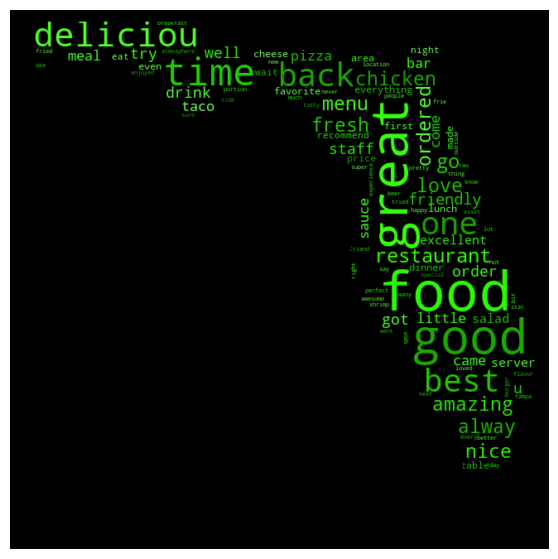

In [86]:
pos_mask = np.array(Image.open("florida.jpg"))
colors = ImageColorGenerator(pos_mask)
text_pos = pos_corp_str

# Create a word cloud image
wc_pos = WordCloud(max_words=100, mask=pos_mask,
                   contour_width=10, background_color="black",contour_color='black',
                   collocations=False)
wc_pos.generate(text_pos)
wc_pos.recolor(color_func=similar_color_func2)
# Generate a wordcloud


plt.figure(figsize=(20,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

## Creating corpus for negative sentiments

In [87]:
neg_corpus = []
for i in range(0, neg.shape[0]):
    text= (neg['removed_punct_text'][i])
    text = text.lower()
    text= text.split()
    text= [word for word in text if not word in set(stops)]
    text=[word for word in text if not word in unuseful_negative_words]
    text = ' '.join(text)
    neg_corpus.append(text)

In [88]:
neg_corp_str = str(neg_corpus)


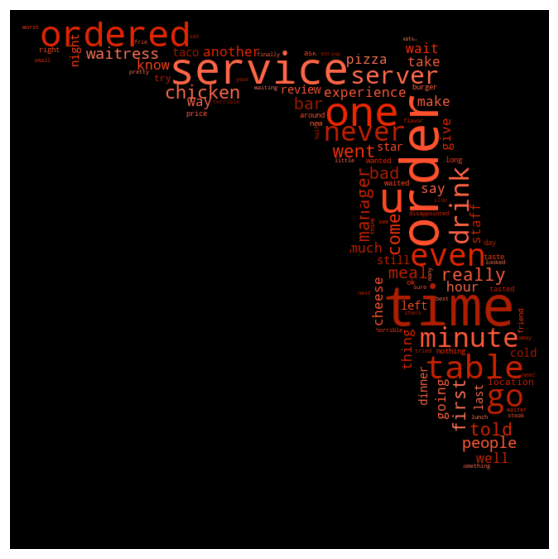

In [89]:
neg_mask = np.array(Image.open("florida.jpg"))
colors = ImageColorGenerator(neg_mask)
text_neg = neg_corp_str

# Create a word cloud image
wc_pos = WordCloud(width = 3000, height = 2000, max_words=100, mask=neg_mask,
                   contour_width=10, background_color="black",contour_color='black',collocations=False)

# Generate a wordcloud
wc_pos.generate(text_neg)
wc_pos.recolor(color_func=similar_color_func)
plt.figure(figsize=(20,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [101]:
def clean(temp):
    corpus1 = []
    for i in range(0, temp.shape[0]):
        review = temp['text'][i]
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stops)]
        review = ' '.join(review)
        corpus1.append(review)
        
    cv = TfidfVectorizer(max_features = 30)
    X = cv.fit_transform(corpus1).toarray()
    return X

In [112]:
bad_reviews='Racist people work here. This man raised his voice at me when i politely asked why my wife was not asked to be put on the waitlist although she wAs first in line than he i saw him politely ask a white group of people even though they were late. Just because the owner is mexican doesnt mean you are not racist. It is blatant that he was rude to me and when i asked him if he skipped my wife cause she was asian he instead of saying no kicked me out. And continue to be polite to white people.'

In [113]:
df_bad_reviews=pd.DataFrame([bad_reviews],columns=['text'])
df_bad_reviews

,text
0,Racist people work here. This man raised his v...


In [114]:
pred_1=lgbm.predict(clean(df_bad_reviews))
pred_1

ValueError: Number of features of the model must match the input. Model n_features_ is 3000 and input n_features is 30

In [109]:
clean(df_bad_reviews)

array([[0.12403473, 0.12403473, 0.49613894, 0.12403473, 0.12403473,
        0.12403473, 0.12403473, 0.12403473, 0.12403473, 0.12403473,
        0.12403473, 0.12403473, 0.12403473, 0.12403473, 0.12403473,
        0.24806947, 0.12403473, 0.3721042 , 0.12403473, 0.24806947,
        0.12403473, 0.12403473, 0.12403473, 0.12403473, 0.12403473,
        0.12403473, 0.12403473, 0.12403473, 0.24806947, 0.24806947]])

In [1]:
!pip install -U textblob
python -m textblob.download_corpora

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [3]:
!pip install cleantext

In [4]:
from textblob import TextBlob
import pandas as pd
import streamlit as st
import cleantext


st.header('Sentiment Analysis')
with st.expander('Analyze Text'):
    text = st.text_input('Text here: ')
    if text:
        blob = TextBlob(text)
        st.write('Polarity: ', round(blob.sentiment.polarity,2))
        st.write('Subjectivity: ', round(blob.sentiment.subjectivity,2))


    pre = st.text_input('Clean Text: ')
    if pre:
        st.write(cleantext.clean(pre, clean_all= False, extra_spaces=True ,
                                 stopwords=True ,lowercase=True ,numbers=True , punct=True))

with st.expander('Analyze CSV'):
    upl = st.file_uploader('Upload file')

    def score(x):
        blob1 = TextBlob(x)
        return blob1.sentiment.polarity

#
    def analyze(x):
        if x >= 0.5:
            return 'Positive'
        elif x <= -0.5:
            return 'Negative'
        else:
            return 'Neutral'

#
    if upl:
        df = pd.read_excel(upl)
        del df['Unnamed: 0']
        df['score'] = df['tweets'].apply(score)
        df['analysis'] = df['score'].apply(analyze)
        st.write(df.head(10))

        @st.cache
        def convert_df(df):
            # IMPORTANT: Cache the conversion to prevent computation on every rerun
            return df.to_csv().encode('utf-8')

        csv = convert_df(df)

        st.download_button(
            label="Download data as CSV",
            data=csv,
            file_name='sentiment.csv',
            mime='text/csv',
        )


2023-03-08 00:54:37.777 
  command:

    streamlit run C:\Users\SOURABH_JAMDADE\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [5]:
streamlit run C:\Users\SOURABH_JAMDADE\anaconda3\lib\site-packages\ipykernel_launcher.py

SyntaxError: invalid syntax (3019974370.py, line 1)